# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import pickle
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Reading Data From CSV File

In [2]:
data = pd.read_csv('flipkart.csv', low_memory=False, encoding='utf-8')

# BASIC EDA

In [3]:
def DataFrameInfo(df):
    # Printing the head 20 rows of a dataframe
    display(df.head(20))
    
    # No.of rows of a dataframe
    display("Number of rows in this DataFrame is:",df.shape[0], "Number of columns in this DataFrame is:", df.shape[1])
    
    # NULL values in a dataframe by columns wise
    display("Total No. of NULL values in each coulmn of this dataframe is:", df.isnull().sum())
    
    # NULL values in a dataframe
    display("Total No. of NULL values in this dataframe is:", df.isnull().sum().sum())
    
    # Duplicate Rows in a dataframe
    display("Total No. of Duplicate values in this dataframe is:",df.duplicated().sum())
    
    # unique values in a each column
    display("Total No. of Duplicate values in this dataframe is:",df.nunique())
    
    # Types of a Dataframe
    display("Datatypes of this dataframe is:", df.dtypes)
    
    # Summary of a dataframe
    display("summarization of numarical columns of this DataFrame is:", df.describe())
    
    # Seprating numerical and categorical columns
    categorical_columns_x = []
    numeric_columns_x = []
    for c in df.columns:
        # check if there are any strings in column
        if df[c].map(type).eq(str).any():  
            categorical_columns_x.append(c)
        else:
            numeric_columns_x.append(c)
    # create two DataFrames, one for each data type
    numerical = df[numeric_columns_x]
    categorical = df[categorical_columns_x]
    # Display numerical Values
    display(numerical)
    
    #Display categorical Values
    display(categorical)
 

DataFrameInfo(data)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
5,c2a17313954882c1dba461863e98adf2,2016-03-25 22:59:23 +0000,http://www.flipkart.com/eternal-gandhi-super-s...,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",PWTEB7H2E4KCYUE3,430.0,430.0,"[""http://img5a.flixcart.com/image/paper-weight...",False,Key Features of Eternal Gandhi Super Series Cr...,No rating available,No rating available,Eternal Gandhi,"{""product_specification""=>[{""key""=>""Model Name..."
6,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
7,8542703ca9e6ebdf6d742638dfb1f2ca,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGYGHFUEXN,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/e/x...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
8,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals","[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH3DZBFR88SCK,699.0,

'Number of rows in this DataFrame is:'

20000

'Number of columns in this DataFrame is:'

15

'Total No. of NULL values in each coulmn of this dataframe is:'

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

'Total No. of NULL values in this dataframe is:'

6039

'Total No. of Duplicate values in this dataframe is:'

0

'Total No. of Duplicate values in this dataframe is:'

uniq_id                    20000
crawl_timestamp              371
product_url                20000
product_name               12676
product_category_tree       6466
pid                        19998
retail_price                2247
discounted_price            2448
image                      18589
is_FK_Advantage_product        2
description                17539
product_rating                36
overall_rating                36
brand                       3499
product_specifications     18825
dtype: int64

'Datatypes of this dataframe is:'

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object

'summarization of numarical columns of this DataFrame is:'

,retail_price,discounted_price
count,19922.000000,19922.000000
mean,2979.206104,1973.401767
std,9009.639341,7333.586040
min,35.000000,35.000000
25%,666.000000,350.000000
50%,1040.000000,550.000000
75%,1999.000000,999.000000
max,571230.000000,571230.000000


,retail_price,discounted_price,is_FK_Advantage_product
0,999.0,379.0,False
1,32157.0,22646.0,False
2,999.0,499.0,False
3,699.0,267.0,False
4,220.0,210.0,False
...,...,...,...
19995,1500.0,730.0,False
19996,1429.0,1143.0,False
19997,1299.0,999.0,False
19998,1499.0,1199.0,False


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,image,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,"[""http://img5a.flixcart.com/image/short/u/4/a/...",Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,"[""http://img5a.flixcart.com/image/short/6/2/h/...",Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,"[""http://img5a.flixcart.com/image/pet-shampoo/...",Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,"[""http://img6a.flixcart.com/image/wall-decorat...",Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ..."
19996,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,"[""http://img6a.flixcart.com/image/sticker/z/g/...",Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,"[""http://img5a.flixcart.com/image/sticker/b/s/...",Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19998,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE8YSVEPPCZ42Y,"[""http://img5a.flixcart.com/image/sticker/4/2/...",Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""

# Creating a NEW dataframe from acutal dataframe by selecting specfic columns

In [4]:
df = pd.DataFrame(data[['description','brand']])
df

,description,brand
0,Key Features of Alisha Solid Women's Cycling S...,Alisha
1,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor
2,Key Features of AW Bellies Sandals Wedges Heel...,AW
3,Key Features of Alisha Solid Women's Cycling S...,Alisha
4,Specifications of Sicons All Purpose Arnica Do...,Sicons
...,...,...
19995,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,WallDesign
19996,Buy Wallmantra Large Vinyl Stickers Sticker fo...,Wallmantra
19997,Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection
19998,Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection


# Cleaning Messy Column Names

In [5]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.columns

Index(['description', 'brand'], dtype='object')

# Removing Special Characters from Dataframe

In [6]:
# Replacing dataFrame in another Variable.
df_spsl = df

# Declaration all Sorts of Special Characters in the form of List.
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–", "//", "%*", ":/", ".;", "Ø", "§"]

# Checking
for c in spec_chars:
    c1 = "\\" + c
    # Replacing With SPACE"".
    df_spsl=df_spsl.replace(c1,"", regex=True)

# Replacing DataFrame with no Special characters.
df1 = df_spsl
print(df1)

                                             description             brand
0      Key Features of Alisha Solid Womens Cycling Sh...            Alisha
1      FabHomeDecor Fabric Double Sofa Bed Finish Col...      FabHomeDecor
2      Key Features of AW Bellies Sandals Wedges Heel...                AW
3      Key Features of Alisha Solid Womens Cycling Sh...            Alisha
4      Specifications of Sicons All Purpose Arnica Do...            Sicons
...                                                  ...               ...
19995  Buy WallDesign Small Vinyl Sticker for Rs730 o...        WallDesign
19996  Buy Wallmantra Large Vinyl Stickers Sticker fo...        Wallmantra
19997  Buy Elite Collection Medium Acrylic Sticker fo...  Elite Collection
19998  Buy Elite Collection Medium Acrylic Sticker fo...  Elite Collection
19999  Buy Elite Collection Medium Acrylic Sticker fo...  Elite Collection

[20000 rows x 2 columns]


# Creating a custom class to Impute Null values using TransformerMixin

In [7]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

df = DataFrameImputer().fit_transform(df1)
print(df)    

                                             description             brand
0      Key Features of Alisha Solid Womens Cycling Sh...            Alisha
1      FabHomeDecor Fabric Double Sofa Bed Finish Col...      FabHomeDecor
2      Key Features of AW Bellies Sandals Wedges Heel...                AW
3      Key Features of Alisha Solid Womens Cycling Sh...            Alisha
4      Specifications of Sicons All Purpose Arnica Do...            Sicons
...                                                  ...               ...
19995  Buy WallDesign Small Vinyl Sticker for Rs730 o...        WallDesign
19996  Buy Wallmantra Large Vinyl Stickers Sticker fo...        Wallmantra
19997  Buy Elite Collection Medium Acrylic Sticker fo...  Elite Collection
19998  Buy Elite Collection Medium Acrylic Sticker fo...  Elite Collection
19999  Buy Elite Collection Medium Acrylic Sticker fo...  Elite Collection

[20000 rows x 2 columns]


# Sepereating Fetures as X and y

In [8]:
X, y = df.description, df.brand

# Text Preprocessing

In [9]:
documents = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)
    

# Bag of Words (BoW)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
# Load the text data
corpus = documents

vectorizer = CountVectorizer(max_features=10, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
docs       = vectorizer.fit_transform(corpus)

# Creating Bag Of Words DataFrame 
bow = pd.DataFrame(docs.A, columns=vectorizer.get_feature_names())

print(bow.to_string())

       buy  day  delivery  flipkartcom  free  genuine  online  price  product  woman
0        0    0         0            0     0        0       0      0        0      3
1        0    0         2            0     1        0       0      1       17      0
2        0    1         0            0     0        0       0      1        1      1
3        0    0         0            0     0        0       0      0        0      3
4        0    0         0            0     0        0       0      0        0      0
5        0    0         0            0     0        0       0      1        3      0
6        0    0         0            0     0        0       0      0        0      3
7        0    0         2            0     1        0       0      1       17      0
8        0    0         0            0     0        0       0      0        1      1
9        0    0         0            0     0        0       0      0        0      3
10       0    0         0            0     0        0       0    

In [ ]:
bow.sum()

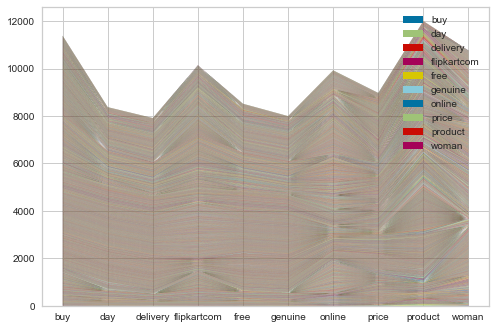

In [14]:
# library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
# Your x and y axis
x=bow.columns
y=bow.values
 
plt.stackplot(x,y, labels=bow.columns )
plt.legend(loc='upper right')
plt.show()

# N-Grams

# TF IDF MODEL and CLUSTERING

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = documents
vectorizer = TfidfVectorizer(min_df = 5, max_df = 0.95, max_features = 10, stop_words = 'english')
vectorizer.fit_transform(corpus)
text = vectorizer.transform(corpus)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


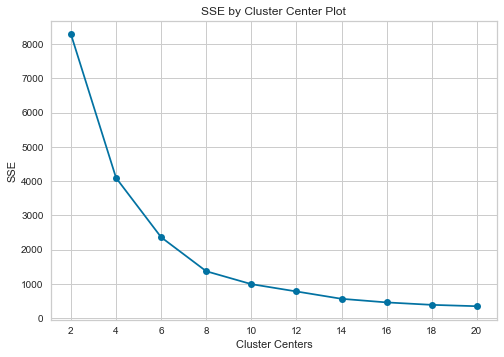

In [93]:
def find_optimal_clusters(test_transform, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(test_transform).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 20)

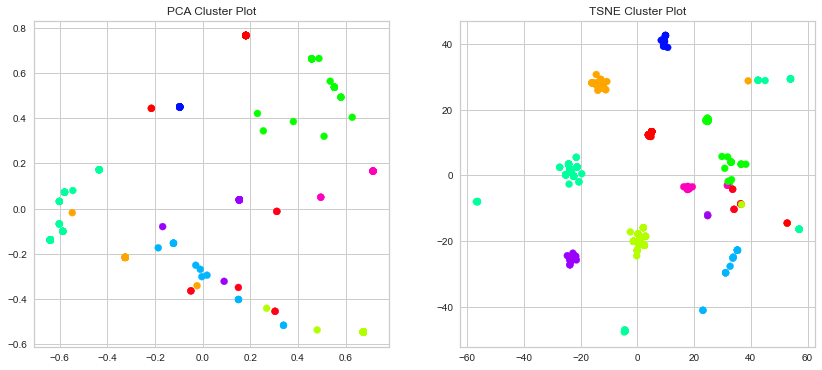

In [97]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm

clusters = MiniBatchKMeans(n_clusters=10, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

def plot_tsne_pca(test_transform, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(test_transform.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(test_transform[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=10).fit_transform(test_transform[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')

plot_tsne_pca(text, clusters)    

In [ ]:
# Top Keywords

In [98]:
def get_top_keywords(test_transform, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)

AttributeError: 'DataFrame' object has no attribute 'todense'